Excercise 1



Because K-NN classifies by features and not sequences, we need to extract the features of the data into vectors and remove the "sequence" from the data, only then can we apply K-NN to it. The extraction can be achieved by using the sliding window method. 

A window of fixed length x will take the first x elements of the time series data, we then slide the window forward one step to obtain another group of data, and so on until the end; the features of each window such as standard deviations, trends, etc. can be extracted. Each window of the window's features vector is now a stand-alone data point ready to be put through K-NN. 

Depending on how data was collected and what classifications are to be made, the sliding of the window may be one-step at a time or each window must not overlap one another. Additionally, if the K-NN is to be used for regression, the time series must be removed of trends, etc. before hand.

Excercise 2

The data was split into 80-20 train-test groups using sklearn.
Using the idea provided in Exercise_train_test.py, the accuracy of the fitted models can be calculated by taking the amount of correctly guessed values (values that match up with the original target class) and dividing by the total number of flowers, placed in the final loop. The models do fine when it comes to the blue data points because they are in their own separate area, but white and red data points often have their area overlap each other is when they start to struggle. It will come down to what the final target of the classification is to choose from which model.

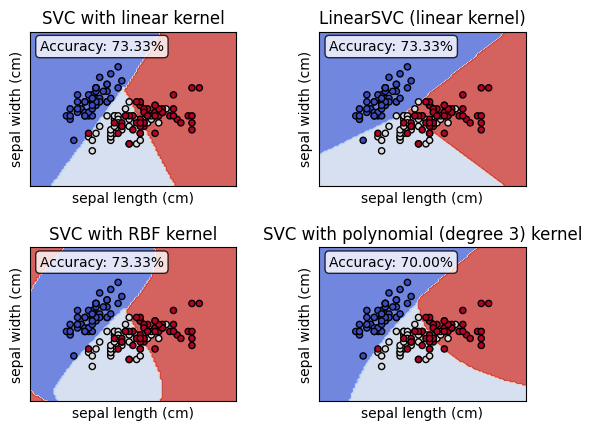

In [15]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with Iris plants dataset
iris = datasets.load_iris()

# Take the first two features (sepal length and sepal width in cm).
# We could avoid this by using a two-dim dataset
X = iris.data[:, :2]

#target is a class information
#class 1: 'setosa'
#class 2: 'versicolor'
#class 3: 'virginica'

y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)


trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



models = (clf.fit(trainX,trainy) for clf in models)
    

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    #calculate accuracy

    prediction_vals = clf.predict(testX)
    correct = 0 
    
    for i in range(0,len(prediction_vals)):
     correct += (prediction_vals[i] == testy[i]).item()
    
    accuracy = correct/len(testy)*100
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
    
    
    #Displays accuracy
    ax.text(0.05, 0.95, f'Accuracy: {accuracy:.2f}%', 
            transform=ax.transAxes, 
            fontsize=10, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.show()

Exercise 3

The confusion matrix can be done by hand, but sklearn does provide the confusion_matrix for an easier time. As with the previous exercise, one group can be separated significantly clearer than the other two. The matrices puts the results in more concrete numbers, while the last exercise is more visual-focused.

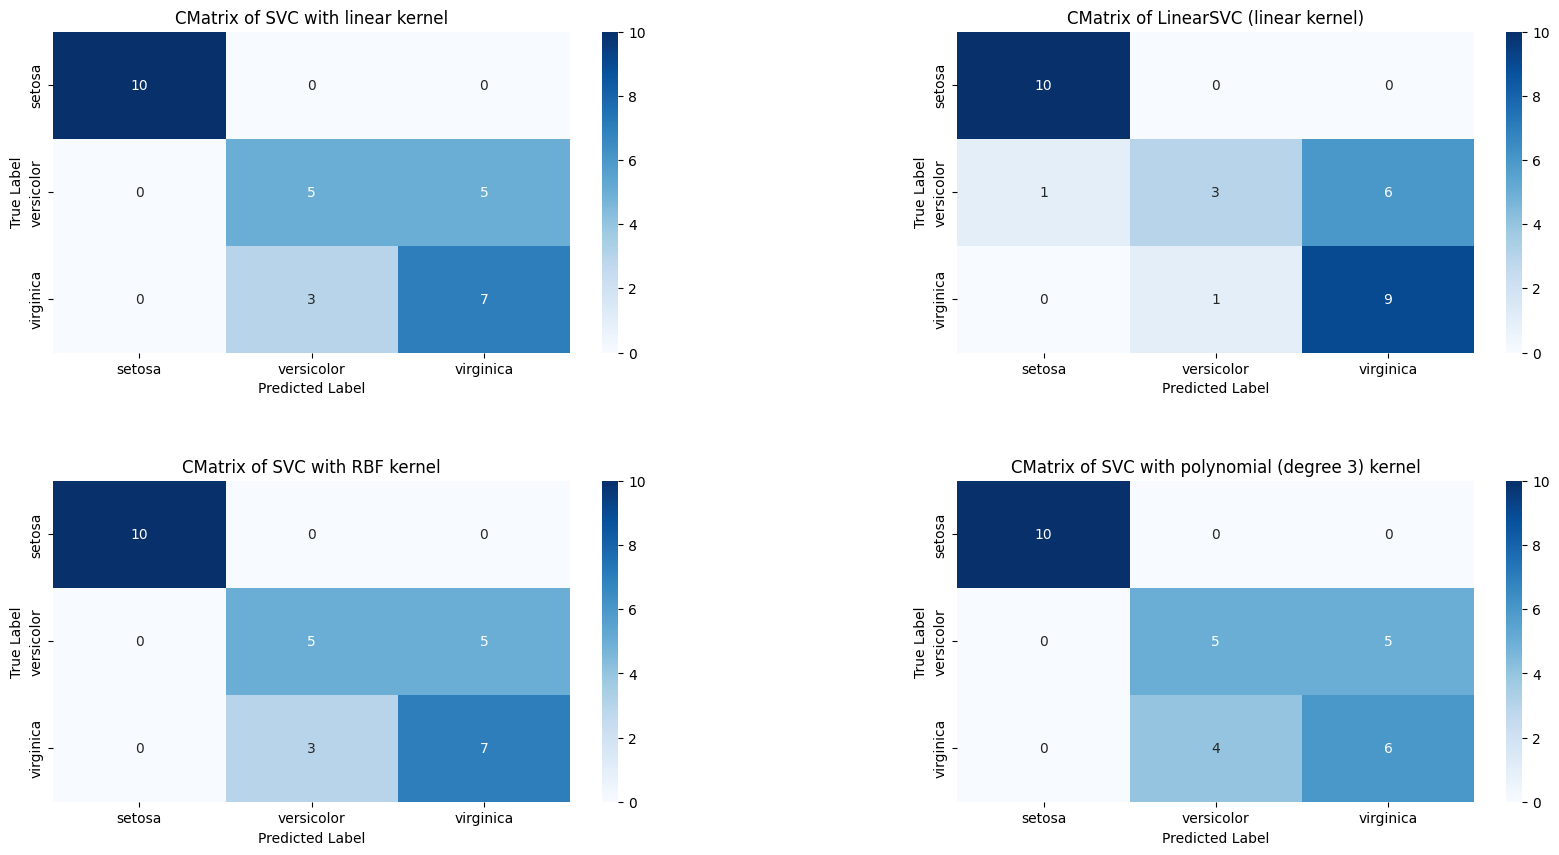

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import seaborn as sns

# import some data to play with Iris plants dataset
iris = datasets.load_iris()

# Take the first two features (sepal length and sepal width in cm).
# We could avoid this by using a two-dim dataset
X = iris.data[:, :2]

#target is a class information
#class 1: 'setosa'
#class 2: 'versicolor'
#class 3: 'virginica'

y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)


trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



models = (clf.fit(trainX,trainy) for clf in models)



# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize= (20,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    prediction_vals = clf.predict(testX)
    
    
    
    #Create and display confusion matrix
    cmatrix = confusion_matrix(testy,prediction_vals)
    
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names,ax=ax)
    ax.set_title(f'CMatrix of {title}')
    ax.set(ylabel="True Label", xlabel="Predicted Label")

plt.show()

Exercise 4

The previous exercises were using only the first 2 features of the data, now we use all of it, applying to linear SVC model specifically. As a result, there is a drastic improvement as there is more and clearer data to train off of.

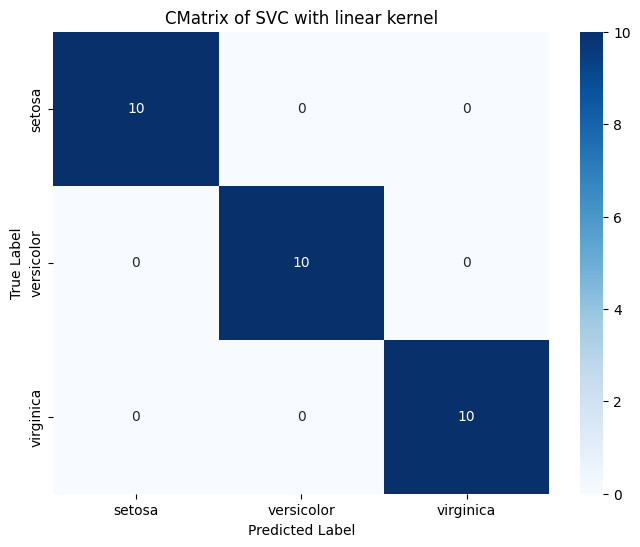

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import seaborn as sns

# import some data to play with Iris plants dataset
iris = datasets.load_iris()

# Take the first two features (sepal length and sepal width in cm).
# We could avoid this by using a two-dim dataset
X = iris.data

#target is a class information
#class 1: 'setosa'
#class 2: 'versicolor'
#class 3: 'virginica'

y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = svm.SVC(kernel="linear",C=C)
model = model.fit(trainX,trainy)


#Create and display confusion matrix
prediction_vals = model.predict(testX)
cmatrix = confusion_matrix(testy,prediction_vals)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,ax=ax)
ax.set_title(f'CMatrix of SVC with linear kernel')
ax.set(ylabel="True Label", xlabel="Predicted Label")



plt.show()

Exercise 5

Cross-validation in ML involves the splitting the data into several parts, training the model on some parts and validating it with the remainders - using its own data to verify the accuracy (cross validating). In this particular exercise, the data is split into k folds, trained on k-1 out of the k folds and tested on the remaining fold.

Manually fitting the model seems to improve the accuracy of the model seems to improve the accuracy only marginally. The default DTC provided by the library seems to produce the highest accuracy of 96.6666..7, adjusting other parameters such as criterion, max depth, etc. seem to either produce the same result or lower accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

#Default DTC
clf = DecisionTreeClassifier(random_state=0)

iris = load_iris()
X = iris.data
y = iris.target



trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


clf.fit(trainX,trainy)
prediction_vals = clf.predict(testX)

correct = 0

for i in range(0,len(prediction_vals)):
    correct += (prediction_vals[i] == testy[i]).item()
    
score = correct/len(testy)
print("Average CV score:",np.mean(cross_val_score(clf, X, y, cv=10)))
print("Accuracy of manual fitting for default DTC:",score)


Average CV score: 0.96
Accuracy of manual fitting for default DTC: 0.9666666666666667


Exercise 6

Splitting the data via the split paramneter from the aeon library produces a more consistent score, using the train_test_split from last exercises produces a different result every time.

X shape (3D -> need to convert to 2D): (40, 6, 100)
X shape after reshaping: (40, 600)
RandomForestClassifier accuracy: 90.00%


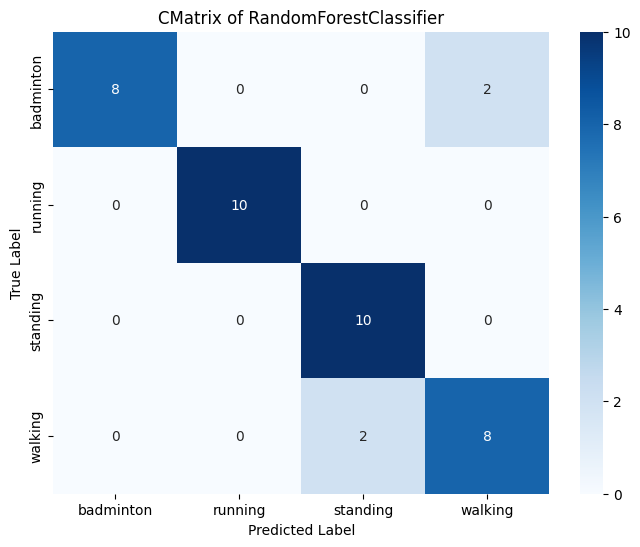

In [17]:
from aeon.datasets import load_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

"""
Original shape (3D): (n_samples, n_channels, n_timepoints)
n_samples: number of time series
n_channels: number of features/sensors
n_timepoints: length of each time series
"""


X_train, trainy = load_classification("BasicMotions", split="train")
X_test, testy = load_classification("BasicMotions", split="test")
print("X shape (3D -> need to convert to 2D):",X_train.shape)

class_labels = np.unique(np.concatenate([trainy, testy]))





"""
If X_train.shape = (40, 6, 100):
40 samples
6 channels (sensors)
100 time points per channel


After reshaping: trainX.shape = (40, 600)
40 samples
600 features (6 * 100 flattened)    
"""


trainX = X_train.reshape(X_train.shape[0], -1)
testX = X_test.reshape(X_test.shape[0], -1)

print("X shape after reshaping:",trainX.shape)


clf = RandomForestClassifier(random_state=0)
clf.fit(trainX,trainy)

prediction_vals = clf.predict(testX)

correct = 0
for i in range(0,len(prediction_vals)):
    if prediction_vals[i] == testy[i]:
        correct+=1
accuracy = correct/len(testy)


print(f"RandomForestClassifier accuracy: {accuracy*100:.2f}%")


#Create and display confusion matrix
cmatrix = confusion_matrix(testy,prediction_vals)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
ax=ax)
ax.set_title(f'CMatrix of RandomForestClassifier')
ax.set(ylabel="True Label", xlabel="Predicted Label")

plt.show()